In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


# Detail design of Features

In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
train_df = pd.read_csv("../input/quora-insincere-questions-classification/train.csv").sample(1000)
X_train = train_df["question_text"]

for row in X_train[:10]:
    print(row)

What are the things not to do in Kerela?
How internet causes lame generation gap?
Which company provides the best quality corporate bus services in Melbourne?
What was your least favorite year of grad school?
Way Kingfisher beer is not available?
While en route to Yavin IV, the first Death Star hits an anomaly and ends up in our universe, in high oribit over modern-day 2017 Earth. What happens?
Is it ok? If my birth date and wedding day is same
Does Accenture provide high process incentives?
Why am I no longer aloud within a 1 mile radius from any primary school?
What are the merits and demerits of using 4-star vs 5-star system to collect user feedback?


In [6]:
text = train_df['question_text']

In [7]:
test_df = pd.read_csv("../input/quora-insincere-questions-classification/test.csv")
X_test = test_df["question_text"].fillna("dieter").values
y = train_df["target"]

1. Remove Numbers 

In [8]:
def removeNumbers(text):
    text = ''.join([i for i in text if not i.isdigit()])         
    return text


In [9]:
text_removeNumbers = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeNumbers['TextBefore'] = text.copy()

In [10]:
text_removeNumbers['TextAfter'] = text_removeNumbers['TextBefore'].apply(removeNumbers)

In [11]:
text_removeNumbers['Changed'] = np.where(text_removeNumbers['TextBefore']==text_removeNumbers['TextAfter'], 'no', 'yes')

print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removeNumbers[text_removeNumbers['Changed']=='yes']), len(text_removeNumbers), 100*len(text_removeNumbers[text_removeNumbers['Changed']=='yes'])/len(text_removeNumbers)))


106 of 1000 (10.6000%) questions have been changed.


In [12]:
text_removeNumbers[
    text_removeNumbers['Changed'] == 'yes'
] # shows all the text where numbers are removed

,TextBefore,TextAfter,Changed
802112,"While en route to Yavin IV, the first Death St...","While en route to Yavin IV, the first Death St...",yes
305895,Why am I no longer aloud within a 1 mile radiu...,Why am I no longer aloud within a mile radius...,yes
1259894,What are the merits and demerits of using 4-st...,What are the merits and demerits of using -sta...,yes
600350,How do I compute [math]\int_0^1 \frac{\ln(x+\s...,How do I compute [math]\int_^ \frac{\ln(x+\sqr...,yes
1014845,"""Can someone explain this quote in 4 lines ple...","""Can someone explain this quote in lines plea...",yes
...,...,...,...
1029332,How can Brexit be resolved by the end of 2018?,How can Brexit be resolved by the end of ?,yes
1248041,How can I take out time for myself with a 3 ye...,How can I take out time for myself with a yea...,yes
620933,Do the social media active Easterners of a con...,Do the social media active Easterners of a con...,yes
483929,Who are the top 10 best hand to hand Marvel/DC...,Who are the top best hand to hand Marvel/DC c...,yes


2. Replace Repetitions of Punctuation
    * exlamation marks with the tag "multiExclamation"
    * question marks with the tag "multiQuestion"
    * stop marks with the tag "multiStop"
      
    

In [13]:
def replaceMultiExclamationMark(text):
    
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):

    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):

    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

In [14]:
text_replaceRepOfPunct = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceRepOfPunct['TextBefore'] = text_removeNumbers['TextAfter']

In [15]:

text_replaceRepOfPunct['TextAfter'] = text_replaceRepOfPunct['TextBefore'].apply(replaceMultiExclamationMark)
text_replaceRepOfPunct['TextAfter'] = text_replaceRepOfPunct['TextBefore'].apply(replaceMultiQuestionMark)
text_replaceRepOfPunct['TextAfter'] = text_replaceRepOfPunct['TextBefore'].apply(replaceMultiStopMark)

In [16]:
text_replaceRepOfPunct['Changed'] = np.where(text_replaceRepOfPunct['TextBefore']==text_replaceRepOfPunct['TextAfter'], 'no', 'yes')

In [17]:
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes']), len(text_replaceRepOfPunct), 100*len(text_replaceRepOfPunct[text_replaceRepOfPunct['Changed']=='yes'])/len(text_replaceRepOfPunct)))

1 of 1000 (0.1000%) questions have been changed.


In [18]:
text_removeNumbers[
    text_removeNumbers['Changed'] == 'yes'
]

,TextBefore,TextAfter,Changed
802112,"While en route to Yavin IV, the first Death St...","While en route to Yavin IV, the first Death St...",yes
305895,Why am I no longer aloud within a 1 mile radiu...,Why am I no longer aloud within a mile radius...,yes
1259894,What are the merits and demerits of using 4-st...,What are the merits and demerits of using -sta...,yes
600350,How do I compute [math]\int_0^1 \frac{\ln(x+\s...,How do I compute [math]\int_^ \frac{\ln(x+\sqr...,yes
1014845,"""Can someone explain this quote in 4 lines ple...","""Can someone explain this quote in lines plea...",yes
...,...,...,...
1029332,How can Brexit be resolved by the end of 2018?,How can Brexit be resolved by the end of ?,yes
1248041,How can I take out time for myself with a 3 ye...,How can I take out time for myself with a yea...,yes
620933,Do the social media active Easterners of a con...,Do the social media active Easterners of a con...,yes
483929,Who are the top 10 best hand to hand Marvel/DC...,Who are the top best hand to hand Marvel/DC c...,yes


3. Remove Punctuation

In [19]:
import string
def translator(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

text_removePunctuation = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removePunctuation['TextBefore'] = text_replaceRepOfPunct['TextAfter']

In [20]:
text_removePunctuation['TextAfter'] = text_removePunctuation['TextBefore'].apply(translator) 

In [21]:
text_removePunctuation['Changed'] = np.where(text_removePunctuation['TextBefore']==text_removePunctuation['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removePunctuation[text_removePunctuation['Changed']=='yes']), len(text_removePunctuation), 100*len(text_removePunctuation[text_removePunctuation['Changed']=='yes'])/len(text_removePunctuation)))


1000 of 1000 (100.0000%) questions have been changed.


In [22]:
text_removePunctuation[
    text_removePunctuation['Changed'] == 'yes'
].iloc[:3]

,TextBefore,TextAfter,Changed
611115,What are the things not to do in Kerela?,What are the things not to do in Kerela,yes
1249425,How internet causes lame generation gap?,How internet causes lame generation gap,yes
189098,Which company provides the best quality corpor...,Which company provides the best quality corpor...,yes


4. Replace Contractions

In [23]:
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'),
                        (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'), (r'(\w+)\'ve', '\g<1> have'),
                        (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'),
                        (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]

In [24]:
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

In [25]:
text_replaceContractions = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceContractions['TextBefore'] = text_removePunctuation['TextAfter']

In [26]:
text_replaceContractions['TextAfter'] = text_replaceContractions['TextBefore'].apply(replaceContraction)

In [27]:
text_replaceContractions['Changed'] = np.where(text_replaceContractions['TextBefore']==text_replaceContractions['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceContractions[text_replaceContractions['Changed']=='yes']), len(text_replaceContractions), 100*len(text_replaceContractions[text_replaceContractions['Changed']=='yes'])/len(text_replaceContractions)))

10 of 1000 (1.0000%) questions have been changed.


In [28]:
text_replaceContractions[
    text_replaceContractions['Changed'] == 'yes'
].iloc[:3]

,TextBefore,TextAfter,Changed
534544,Would you take a job knowing how much time and...,Would you take a job knowing how much time and...,yes
933749,Why is every third question on Quora related t...,Why is every third question on Quora related t...,yes
274772,Is it fun for people to pretend to have crushe...,Is it fun for people to pretend to have crushe...,yes


5. Lowercase

In [29]:
text_lowercase = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_lowercase['TextBefore'] = text_replaceContractions['TextAfter']

text_lowercase['TextAfter'] = text_lowercase['TextBefore'].str.lower()


text_lowercase['Changed'] = np.where(text_lowercase['TextBefore']==text_lowercase['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_lowercase[text_lowercase['Changed']=='yes']), len(text_lowercase), 100*len(text_lowercase[text_lowercase['Changed']=='yes'])/len(text_lowercase)))



1000 of 1000 (100.0000%) questions have been changed.


6. Replace Negations with Antonyms

In [30]:
import nltk
from nltk.corpus import wordnet

def replace(word, pos=None):

    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())
    if len(antonyms) == 1:
        return antonyms.pop()
    else:
        return None

def replaceNegations(text):

    i, l = 0, len(text)
    words = []
    while i < l:
        word = text[i]
        if word == 'not' and i+1 < l:
            ant = replace(text[i+1])
            if ant:
                words.append(ant)
                i += 2
                continue
        words.append(word)
        i += 1
    return words

def tokenize1(text):
    tokens = nltk.word_tokenize(text)
    tokens = replaceNegations(tokens)
    text = " ".join(tokens)
    return text


In [31]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [32]:
text_replaceNegations = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_replaceNegations['TextBefore'] = text_lowercase['TextAfter']

text_replaceNegations['TextAfter'] = text_replaceNegations['TextBefore'].apply(tokenize1)

In [33]:
text_replaceNegations['Changed'] = np.where(text_replaceNegations['TextBefore'].str.replace(" ","")==text_replaceNegations['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_replaceNegations[text_replaceNegations['Changed']=='yes']), len(text_replaceNegations), 100*len(text_replaceNegations[text_replaceNegations['Changed']=='yes'])/len(text_replaceNegations)))

9 of 1000 (0.9000%) questions have been changed.


7. Handle Capitalized Words

In [34]:
def addCapTag(word):
    """ Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_ """
    if(len(re.findall("[A-Z]{3,}", word))):
        word = word.replace('\\', '' )
        transformed = re.sub("[A-Z]{3,}", "ALL_CAPS_"+word, word)
        return transformed
    else:
        return word

def tokenize2(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(addCapTag(w))
    text = " ".join(finalTokens)
    return text

In [35]:
text_handleCapWords = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_handleCapWords['TextBefore'] = text_replaceNegations['TextAfter']

In [36]:
text_handleCapWords['TextAfter'] = text_handleCapWords['TextBefore'].apply(addCapTag)
text_handleCapWords['TextAfter'] = text_handleCapWords['TextBefore'].apply(tokenize2)

In [37]:
text_handleCapWords['Changed'] = np.where(text_handleCapWords['TextBefore'].str.replace(" ","")==text_handleCapWords['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_handleCapWords[text_handleCapWords['Changed']=='yes']), len(text_handleCapWords), 100*len(text_handleCapWords[text_handleCapWords['Changed']=='yes'])/len(text_handleCapWords)))


0 of 1000 (0.0000%) questions have been changed.


8. Remove Stopwords

In [38]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in stoplist):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

text_removeStopwords = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeStopwords['TextBefore'] = text_handleCapWords['TextAfter']

text_removeStopwords['TextAfter'] = text_removeStopwords['TextBefore'].apply(tokenize)

text_removeStopwords['Changed'] = np.where(text_removeStopwords['TextBefore'].str.replace(" ","")==text_removeStopwords['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removeStopwords[text_removeStopwords['Changed']=='yes']), len(text_removeStopwords), 100*len(text_removeStopwords[text_removeStopwords['Changed']=='yes'])/len(text_removeStopwords)))



998 of 1000 (99.8000%) questions have been changed.


9. Replace Elongated Words

In [39]:
def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word
    
def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(replaceElongated(w))
    text = " ".join(finalTokens)
    return text

text_removeElWords = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_removeElWords['TextBefore'] = text_removeStopwords['TextAfter']

text_removeElWords['TextAfter'] = text_removeElWords['TextBefore'].apply(tokenize)

text_removeElWords['Changed'] = np.where(text_removeElWords['TextBefore'].str.replace(" ","")==text_removeElWords['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_removeElWords[text_removeElWords['Changed']=='yes']), len(text_removeElWords), 100*len(text_removeElWords[text_removeElWords['Changed']=='yes'])/len(text_removeElWords)))



117 of 1000 (11.7000%) questions have been changed.


10. Stemming/Lemmatizing

In [40]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() #set stemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(stemmer.stem(w)) # change this to lemmatizer.lemmatize(w) for Lemmatizing
    text = " ".join(finalTokens)
    return text

text_stemming = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_stemming['TextBefore'] = text_removeElWords['TextAfter']

text_stemming['TextAfter'] = text_stemming['TextBefore'].apply(tokenize)
    
    
text_stemming['Changed'] = np.where(text_stemming['TextBefore'].str.replace(" ","")==text_stemming['TextAfter'].str.replace(" ","").str.replace("``",'"').str.replace("''",'"'), 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_stemming[text_stemming['Changed']=='yes']), len(text_stemming), 100*len(text_stemming[text_stemming['Changed']=='yes'])/len(text_stemming)))

926 of 1000 (92.6000%) questions have been changed.


In [41]:
sincere_questions = train_df[train_df['target'] == 0]
insincere_questions = train_df[train_df['target'] == 1]

In [42]:
sincere_questions.shape, insincere_questions.shape

((945, 3), (55, 3))

In [43]:
sincere_questions['length'] = sincere_questions['question_text'].apply(lambda x : len(x))
insincere_questions['length'] = insincere_questions['question_text'].apply(lambda x : len(x))
train_df['length'] = train_df['question_text'].apply(lambda x : len(x))

/tmp/ipykernel_46/1211722267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sincere_questions['length'] = sincere_questions['question_text'].apply(lambda x : len(x))
/tmp/ipykernel_46/1211722267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insincere_questions['length'] = insincere_questions['question_text'].apply(lambda x : len(x))


In [44]:
import os
import json
import string
import numpy as np
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# from pandas.io.json import json_normalize
from pandas import json_normalize 

from plotly import tools
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
color = sns.color_palette()
np.random.seed(13)
%matplotlib inline

The Meta Features Based On Word/Character

In [45]:
from tqdm import tqdm 
print(">> Generating Count Based And Demographical Features")
for df in ([train_df]):
    df['length'] = df['question_text'].apply(lambda x : len(x))
    df['capitals'] = df['question_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['length']),axis=1)
    df['num_exclamation_marks'] = df['question_text'].apply(lambda comment: comment.count('!'))
    df['num_question_marks'] = df['question_text'].apply(lambda comment: comment.count('?'))
    df['num_punctuation'] = df['question_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
    df['num_symbols'] = df['question_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
    df['num_words'] = df['question_text'].apply(lambda comment: len(comment.split()))
    df['num_unique_words'] = df['question_text'].apply(lambda comment: len(set(w for w in comment.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
    df['num_smilies'] = df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
    df['num_sad'] = df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-<', ':()', ';-()', ';(')))

>> Generating Count Based And Demographical Features


In [46]:
train_df[train_df.columns[2:]].head(8)

,target,length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,num_sad
611115,0,40,2,0.050000,0,1,0,0,9,9,1.000000,0,0
1249425,0,40,1,0.025000,0,1,0,0,6,6,1.000000,0,0
189098,0,76,2,0.026316,0,1,0,0,11,11,1.000000,0,0
382169,0,49,1,0.020408,0,1,0,0,9,9,1.000000,0,0
947073,0,37,2,0.054054,0,1,0,0,6,6,1.000000,0,0
802112,0,150,8,0.053333,0,1,3,0,28,27,0.964286,0,0
222320,0,50,2,0.040000,0,1,0,0,12,12,1.000000,0,0
1043195,0,47,2,0.042553,0,1,0,0,6,6,1.000000,0,0


In [47]:
# List Of Bad Words by Google-Profanity Words 
bad_words = ['cockknocker', 'n1gger', 'ing', 'fukker', 'nympho', 'fcuking', 'gook', 'freex', 'arschloch', 'fistfucked', 'chinc', 'raunch', 'fellatio', 'splooge', 'nutsack', 'lmfao', 'wigger', 'bastard', 'asses', 'fistfuckings', 'blue', 'waffle', 'beeyotch', 'pissin', 'dominatrix', 'fisting', 'vullva', 'paki', 'cyberfucker', 'chuj', 'penuus', 'masturbate', 'b00b*', 'fuks', 'sucked', 'fuckingshitmotherfucker', 'feces', 'panty', 'coital', 'wh00r.', 'whore', 'condom', 'hells', 'foreskin', 'wanker', 'hoer', 'sh1tz', 'shittings', 'wtf', 'recktum', 'dick*', 'pr0n', 'pasty', 'spik', 'phukked', 'assfuck', 'xxx', 'nigger*', 'ugly', 's_h_i_t', 'mamhoon', 'pornos', 'masterbates', 'mothafucks', 'Mother', 'Fukkah', 'chink', 'pussy', 'palace', 'azazel', 'fistfucking', 'ass-fucker', 'shag', 'chincs', 'duche', 'orgies', 'vag1na', 'molest', 'bollock', 'a-hole', 'seduce', 'Cock*', 'dog-fucker', 'shitz', 'Mother', 'Fucker', 'penial', 'biatch', 'junky', 'orifice', '5hit', 'kunilingus', 'cuntbag', 'hump', 'butt', 'fuck', 'titwank', 'schaffer', 'cracker', 'f.u.c.k', 'breasts', 'd1ld0', 'polac', 'boobs', 'ritard', 'fuckup', 'rape', 'hard', 'on', 'skanks', 'coksucka', 'cl1t', 'herpy', 's.o.b.', 'Motha', 'Fucker', 'penus', 'Fukker', 'p.u.s.s.y.', 'faggitt', 'b!tch', 'doosh', 'titty', 'pr1k', 'r-tard', 'gigolo', 'perse', 'lezzies', 'bollock*', 'pedophiliac', 'Ass', 'Monkey', 'mothafucker', 'amcik', 'b*tch', 'beaner', 'masterbat*', 'fucka', 'phuk', 'menses', 'pedophile', 'climax', 'cocksucking', 'fingerfucked', 'asswhole', 'basterdz', 'cahone', 'ahole', 'dickflipper', 'diligaf', 'Lesbian', 'sperm', 'pisser', 'dykes', 'Skanky', 'puuker', 'gtfo', 'orgasim', 'd0ng', 'testicle*', 'pen1s', 'piss-off', '@$$', 'fuck', 'trophy', 'arse*', 'fag', 'organ', 'potty', 'queerz', 'fannybandit', 'muthafuckaz', 'booger', 'pussypounder', 'titt', 'fuckoff', 'bootee', 'schlong', 'spunk', 'rumprammer', 'weed', 'bi7ch', 'pusse', 'blow', 'job', 'kusi*', 'assbanged', 'dumbass', 'kunts', 'chraa', 'cock', 'sucker', 'l3i+ch', 'cabron', 'arrse', 'cnut', 'how', 'to', 'murdep', 'fcuk', 'phuked', 'gang-bang', 'kuksuger', 'mothafuckers', 'ghey', 'clit', 'licker', 'feg', 'ma5terbate', 'd0uche', 'pcp', 'ejaculate', 'nigur', 'clits', 'd0uch3', 'b00bs', 'fucked', 'assbang', 'mutha', 'goddamned', 'cazzo', 'lmao', 'godamn', 'kill', 'coon', 'penis-breath', 'kyke', 'heshe', 'homo', 'tawdry', 'pissing', 'cumshot', 'motherfucker', 'menstruation', 'n1gr', 'rectus', 'oral', 'twats', 'scrot', 'God', 'damn', 'jerk', 'nigga', 'motherfuckin', 'kawk', 'homey', 'hooters', 'rump', 'dickheads', 'scrud', 'fist', 'fuck', 'carpet', 'muncher', 'cipa', 'cocaine', 'fanyy', 'frigga', 'massa', '5h1t', 'brassiere', 'inbred', 'spooge', 'shitface', 'tush', 'Fuken', 'boiolas', 'fuckass', 'wop*', 'cuntlick', 'fucker', 'bodily', 'bullshits', 'hom0', 'sumofabiatch', 'jackass', 'dilld0', 'puuke', 'cums', 'pakie', 'cock-sucker', 'pubic', 'pron', 'puta', 'penas', 'weiner', 'vaj1na', 'mthrfucker', 'souse', 'loin', 'clitoris', 'f.ck', 'dickface', 'rectal', 'whored', 'bookie', 'chota', 'bags', 'sh!t', 'pornography', 'spick', 'seamen', 'Phukker', 'beef', 'curtain', 'eat', 'hair', 'pie', 'mother', 'fucker', 'faigt', 'yeasty', 'Clit', 'kraut', 'CockSucker', 'Ekrem*', 'screwing', 'scrote', 'fubar', 'knob', 'end', 'sleazy', 'dickwhipper', 'ass', 'fuck', 'fellate', 'lesbos', 'nobjokey', 'dogging', 'fuck', 'hole', 'hymen', 'damn', 'dego', 'sphencter', 'queef*', 'gaylord', 'va1jina', 'a55', 'fuck', 'douchebag', 'blowjob', 'mibun', 'fucking', 'dago', 'heroin', 'tw4t', 'raper', 'muff', 'fitt*', 'wetback*', 'mo-fo', 'fuk*', 'klootzak', 'sux', 'damnit', 'pimmel', 'assh0lez', 'cntz', 'fux', 'gonads', 'bullshit', 'nigg3r', 'fack', 'weewee', 'shi+', 'shithead', 'pecker', 'Shytty', 'wh0re', 'a2m', 'kkk', 'penetration', 'kike', 'naked', 'kooch', 'ejaculation', 'bang', 'hoare', 'jap', 'foad', 'queef', 'buttwipe', 'Shity', 'dildo', 'dickripper', 'crackwhore', 'beaver', 'kum', 'sh!+', 'qweers', 'cocksuka', 'sexy', 'masterbating', 'peeenus', 'gays', 'cocksucks', 'b17ch', 'nad', 'j3rk0ff', 'fannyflaps', 'God-damned', 'masterbate', 'erotic', 'sadism', 'turd', 'flipping', 'the', 'bird', 'schizo', 'whiz', 'fagg1t', 'cop', 'some', 'wood', 'banger', 'Shyty', 'f', 'you', 'scag', 'soused', 'scank', 'clitorus', 'kumming', 'quim', 'penis', 'bestial', 'bimbo', 'gfy', 'spiks', 'shitings', 'phuking', 'paddy', 'mulkku', 'anal', 'leakage', 'bestiality', 'smegma', 'bull', 'shit', 'pillu*', 'schmuck', 'cuntsicle', 'fistfucker', 'shitdick', 'dirsa', 'm0f0']
print(">> Words in bad_word list:", len(bad_words))

>> Words in bad_word list: 447


In [48]:
print(">> Generating Features on Bad Words")
for df in ([train_df]):
    df["badwordcount"] = df['question_text'].apply(lambda comment: sum(comment.count(w) for w in bad_words))
    df['num_chars'] =    df['question_text'].apply(len)
    df["normchar_badwords"] = df["badwordcount"]/df['num_chars']
    df["normword_badwords"] = df["badwordcount"]/df['num_words']

>> Generating Features on Bad Words


In [49]:
train_df[['badwordcount','num_chars','normchar_badwords','normword_badwords']].head(8)


,badwordcount,num_chars,normchar_badwords,normword_badwords
611115,3,40,0.075000,0.333333
1249425,1,40,0.025000,0.166667
189098,1,76,0.013158,0.090909
382169,3,49,0.061224,0.333333
947073,2,37,0.054054,0.333333
802112,5,150,0.033333,0.178571
222320,2,50,0.040000,0.166667
1043195,0,47,0.000000,0.000000


Tagging Parts Of Speech And More Feature Engineering..
I suspect that the insincere questions have significant adverbs/adjective that makes them toxic. I am hopeful that these features might model understand various POS structures in the question_text

In [50]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return[noun_count, adjective_count, verb_count]

In [51]:
print(">> Generating POS Features")
for df in ([train_df]):
    df['nouns'], df['adjectives'], df['verbs'] = zip(*df['question_text'].apply(
        lambda comment: tag_part_of_speech(comment)))
    df['nouns_vs_length'] = df['nouns'] / df['length']
    df['adjectives_vs_length'] = df['adjectives'] / df['length']
    df['verbs_vs_length'] = df['verbs'] /df['length']
    df['nouns_vs_words'] = df['nouns'] / df['num_words']
    df['adjectives_vs_words'] = df['adjectives'] / df['num_words']
    df['verbs_vs_words'] = df['verbs'] / df['num_words']
    # More Handy Features
    df["count_words_title"] = df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    df["mean_word_len"] = df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['punct_percent']= df['num_punctuation']*100/df['num_words']

>> Generating POS Features


In [52]:
train_df[['nouns','nouns_vs_length','adjectives_vs_length','verbs_vs_length','nouns_vs_words','adjectives_vs_words','verbs_vs_words']].head(8)

,nouns,nouns_vs_length,adjectives_vs_length,verbs_vs_length,nouns_vs_words,adjectives_vs_words,verbs_vs_words
611115,2,0.050000,0.000000,0.050000,0.222222,0.000000,0.222222
1249425,3,0.075000,0.050000,0.000000,0.500000,0.333333,0.000000
189098,5,0.065789,0.039474,0.013158,0.454545,0.272727,0.090909
382169,2,0.040816,0.061224,0.020408,0.222222,0.333333,0.111111
947073,3,0.081081,0.027027,0.027027,0.500000,0.166667,0.166667
802112,9,0.060000,0.020000,0.020000,0.321429,0.107143,0.107143
222320,4,0.080000,0.040000,0.040000,0.333333,0.166667,0.166667
1043195,4,0.085106,0.021277,0.021277,0.666667,0.166667,0.166667


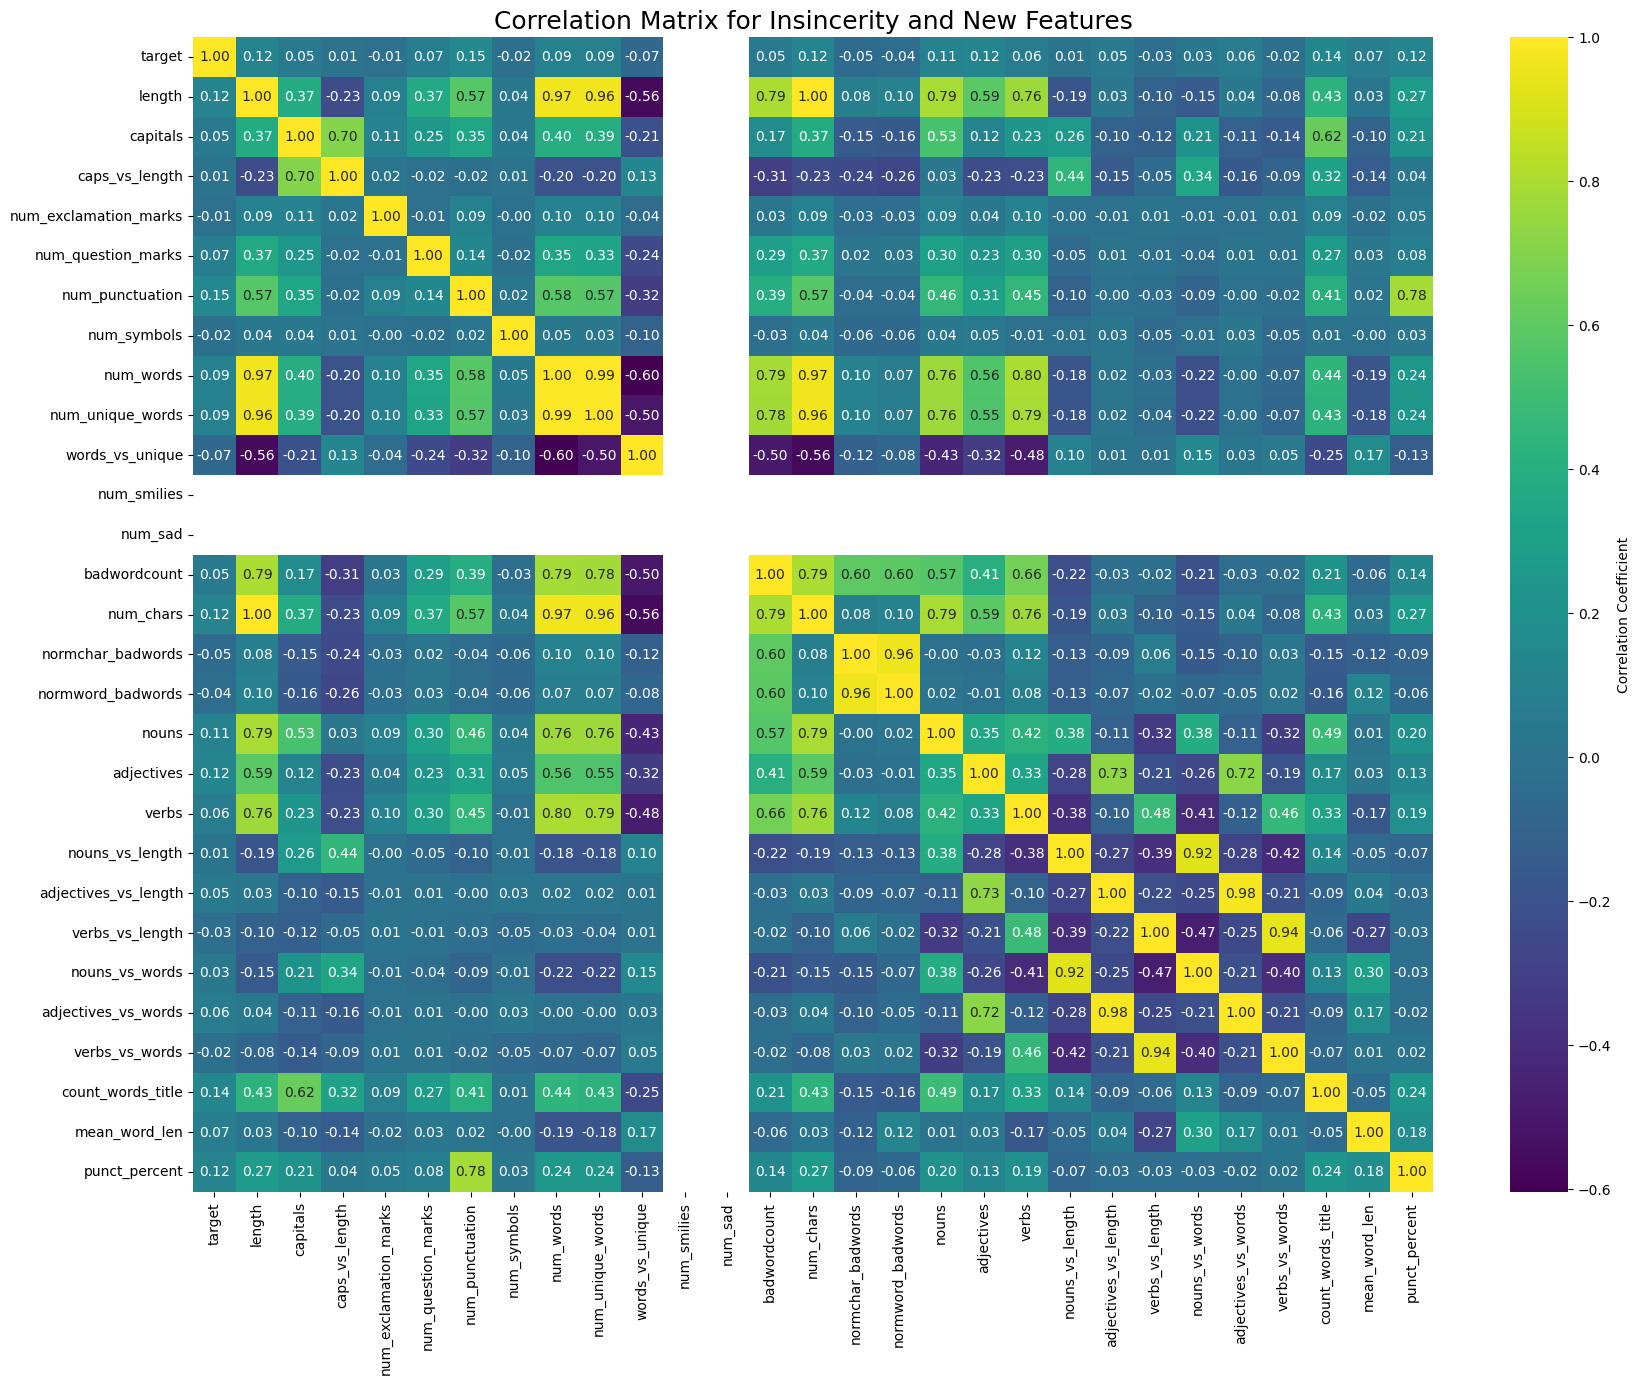

In [53]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(train_df.drop(['qid','question_text'], axis=1).corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Correlation Coefficient'}, cmap='viridis')
ax.set_title("Correlation Matrix for Insincerity and New Features", fontsize=18)
plt.show()

Statistics

In [54]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import string
import random
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
import concurrent.futures
import time
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
!pip install textstat
import textstat
import warnings
import nltk
warnings.filterwarnings('ignore')

%matplotlib inline
import os
print(os.listdir("../input"))

# Plotly based imports for visualization
from plotly import tools
!pip install chart-studio
import chart_studio as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:0000:0100:01
['quora-insincere-questions-classification']
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [55]:
# SpaCy Parser for questions
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [56]:
quora_train = train_df

In [57]:
tqdm.pandas()
sincere_questions = quora_train["question_text"][quora_train["target"] == 0].progress_apply(spacy_tokenizer)
insincere_questions = quora_train["question_text"][quora_train["target"] == 1].progress_apply(spacy_tokenizer)

100%|██████████| 55/55 [00:00<00:00, 2234.10it/s]


In [58]:

def plot_readability(a,b,title,bins=0.1,colors=['#3A4750', '#F64E8B']):
    trace1 = ff.create_distplot([a,b], ["Sincere questions","Insincere questions"], bin_size=bins, colors=colors, show_rug=False)
    trace1['layout'].update(title=title)
    iplot(trace1, filename='Distplot')
    table_data= [["Statistical Measures","Sincere questions","Insincere questions"],
                ["Mean",mean(a),mean(b)],
                ["Standard Deviation",pstdev(a),pstdev(b)],
                ["Variance",pvariance(a),pvariance(b)],
                ["Median",median(a),median(b)],
                ["Maximum value",max(a),max(b)],
                ["Minimum value",min(a),min(b)]]
    trace2 = ff.create_table(table_data)
    iplot(trace2, filename='Table')

100%|██████████| 55/55 [00:00<00:00, 4960.90it/s]


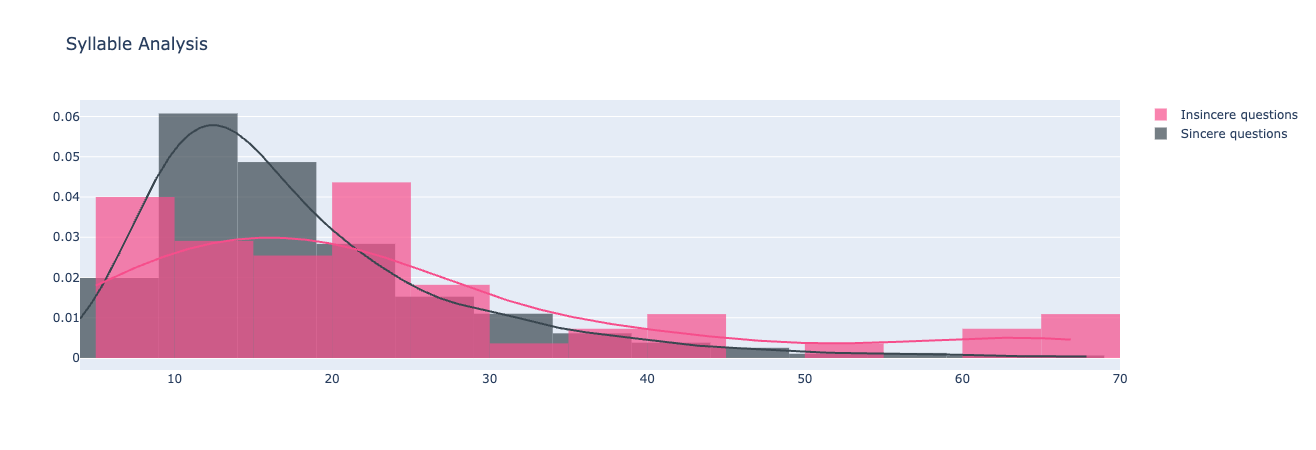

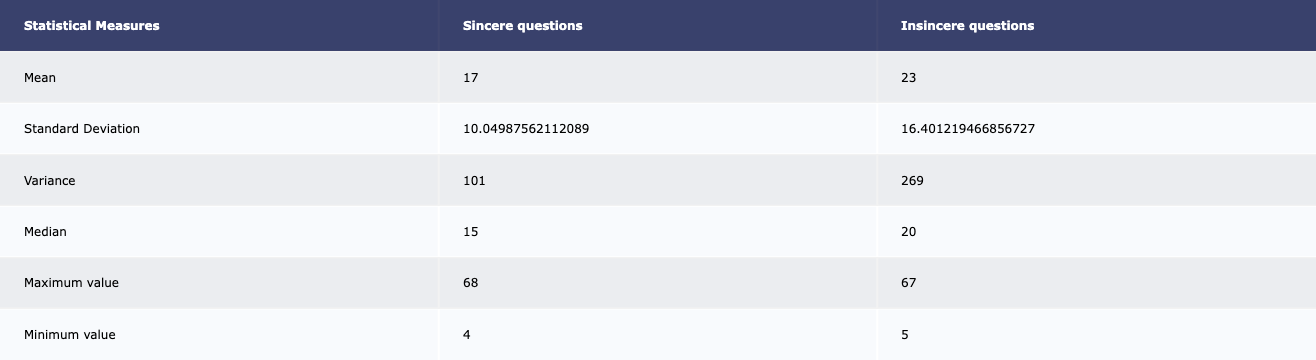

In [59]:
syllable_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.syllable_count))
syllable_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.syllable_count))
plot_readability(syllable_sincere,syllable_insincere,"Syllable Analysis",5)
    

100%|██████████| 55/55 [00:00<00:00, 67948.96it/s]


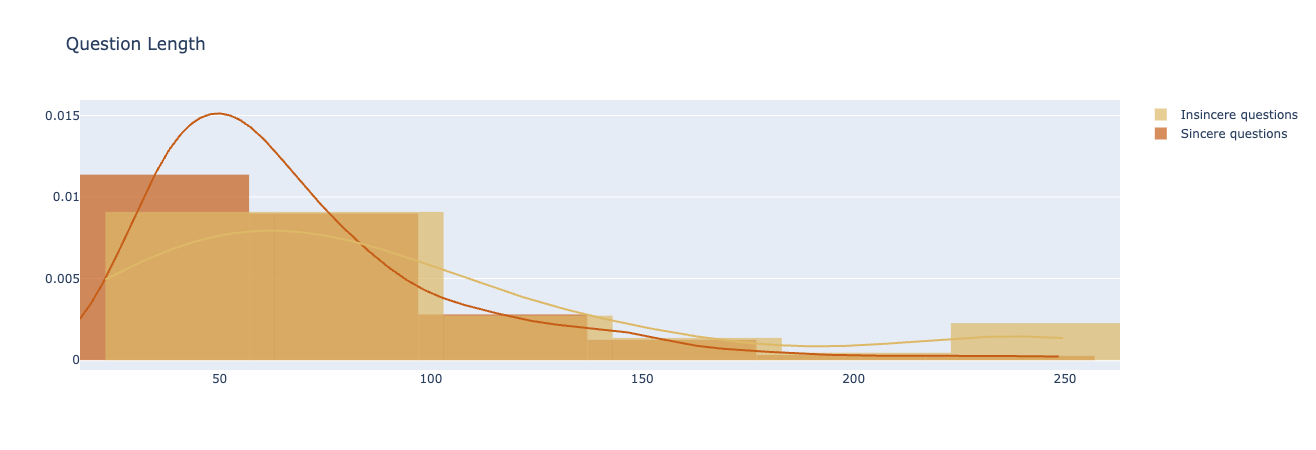

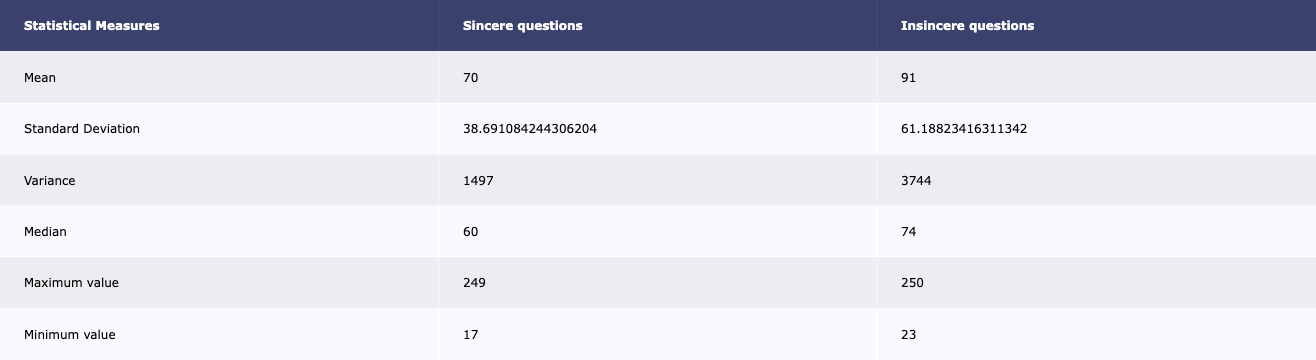

In [60]:
length_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(len))
length_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(len))
plot_readability(length_sincere,length_insincere,"Question Length",40,['#C65D17','#DDB967'])


100%|██████████| 55/55 [00:00<00:00, 15163.79it/s]


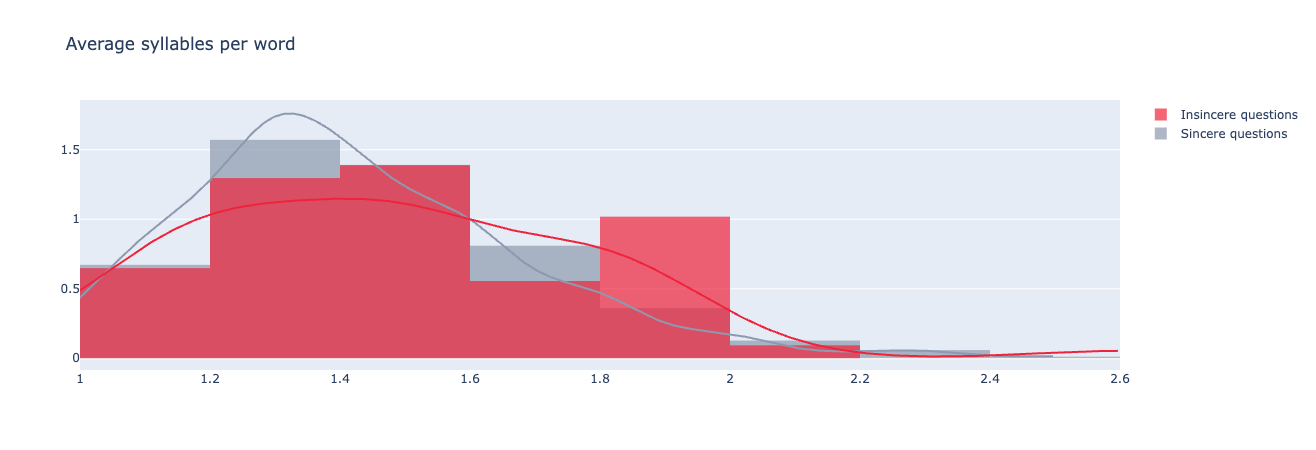

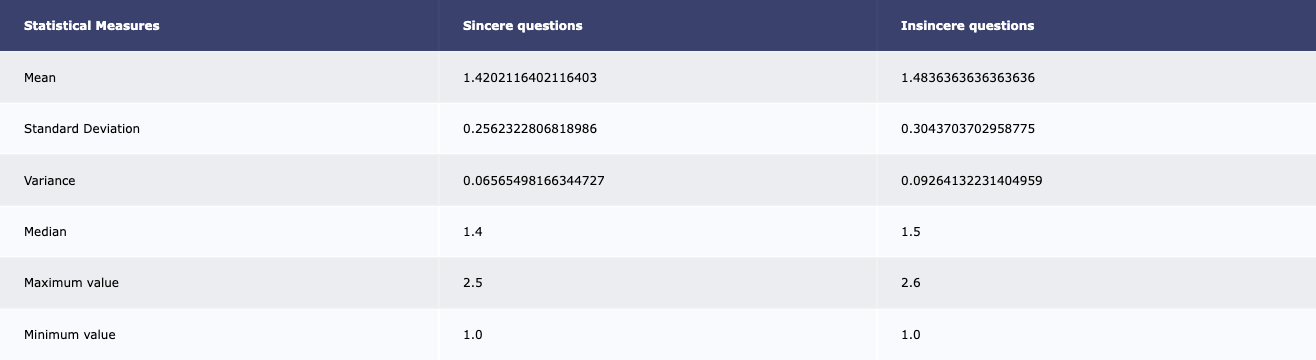

In [61]:
spw_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.avg_syllables_per_word))
spw_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.avg_syllables_per_word))
plot_readability(spw_sincere,spw_insincere,"Average syllables per word",0.2,['#8D99AE','#EF233C'])

100%|██████████| 55/55 [00:00<00:00, 23266.44it/s]


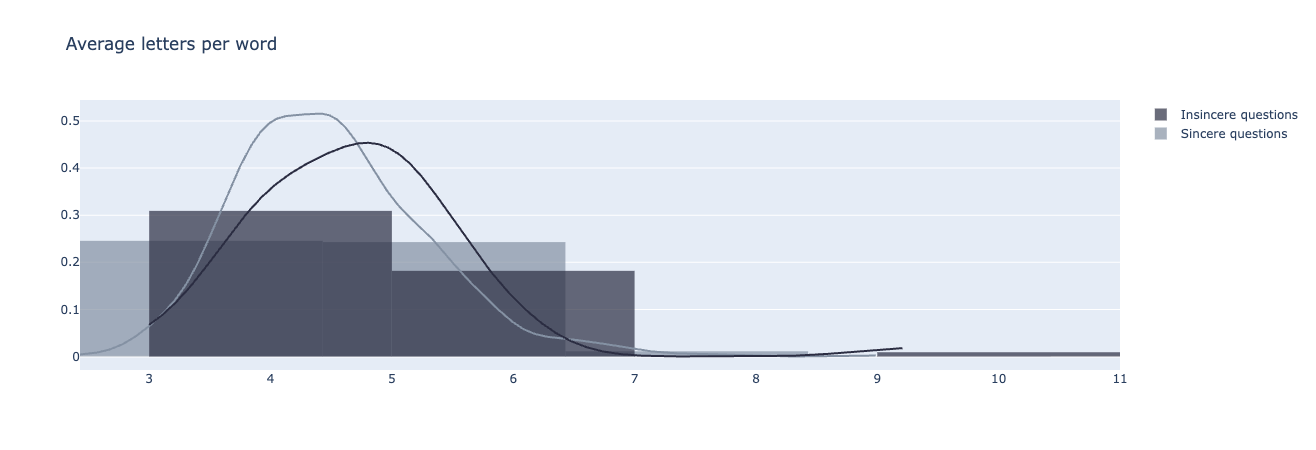

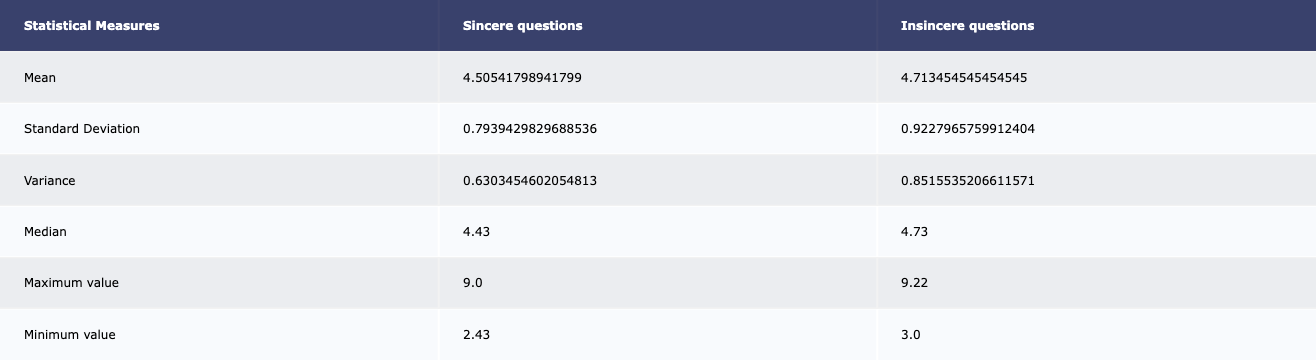

In [62]:
lpw_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.avg_letter_per_word))
lpw_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.avg_letter_per_word))
plot_readability(lpw_sincere,lpw_insincere,"Average letters per word",2,['#8491A3','#2B2D42'])

In [63]:
# Readability features
# This basically returns the readability statistics for given text.

# 6.1 The Flesch Reading Ease formula
# The following table can be helpful to assess the ease of readability in a document.

# Score - Difficulty
# 90-100 - Very Easy
# 80-89 - Easy
# 70-79 - Fairly Easy
# 60-69 - Standard
# 50-59 - Fairly Difficult
# 30-49 - Difficult
# 0-29 - Very Confusing

100%|██████████| 55/55 [00:00<00:00, 10385.68it/s]


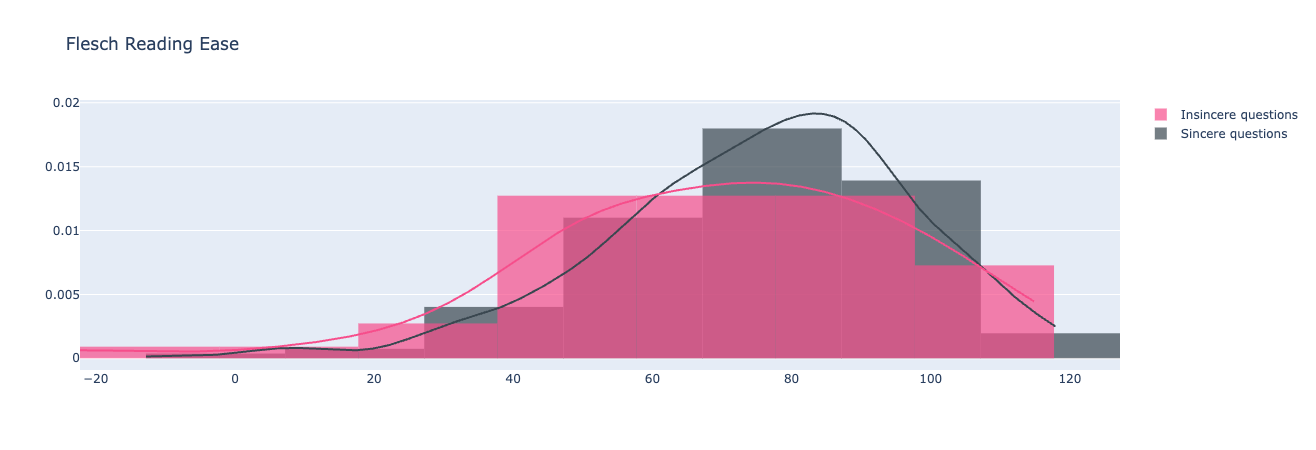

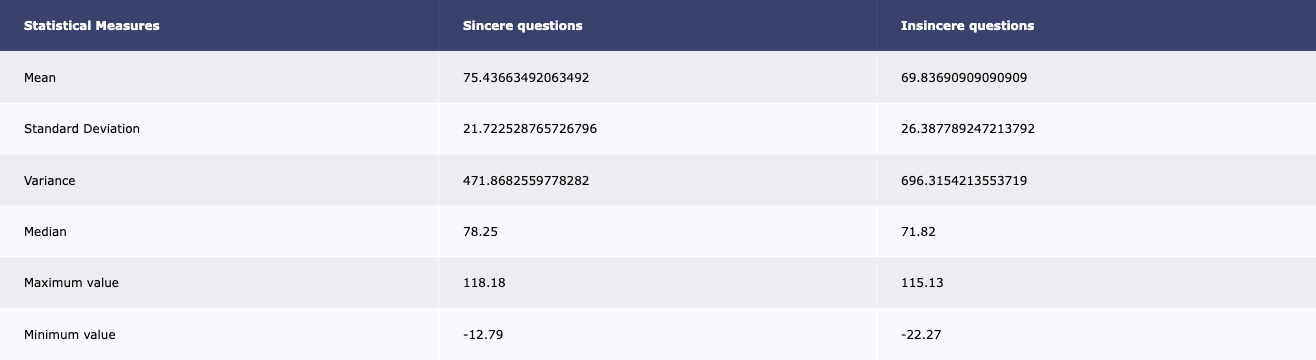

In [64]:
fre_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.flesch_reading_ease))
fre_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.flesch_reading_ease))
plot_readability(fre_sincere,fre_insincere,"Flesch Reading Ease",20)

100%|██████████| 55/55 [00:00<00:00, 11425.23it/s]


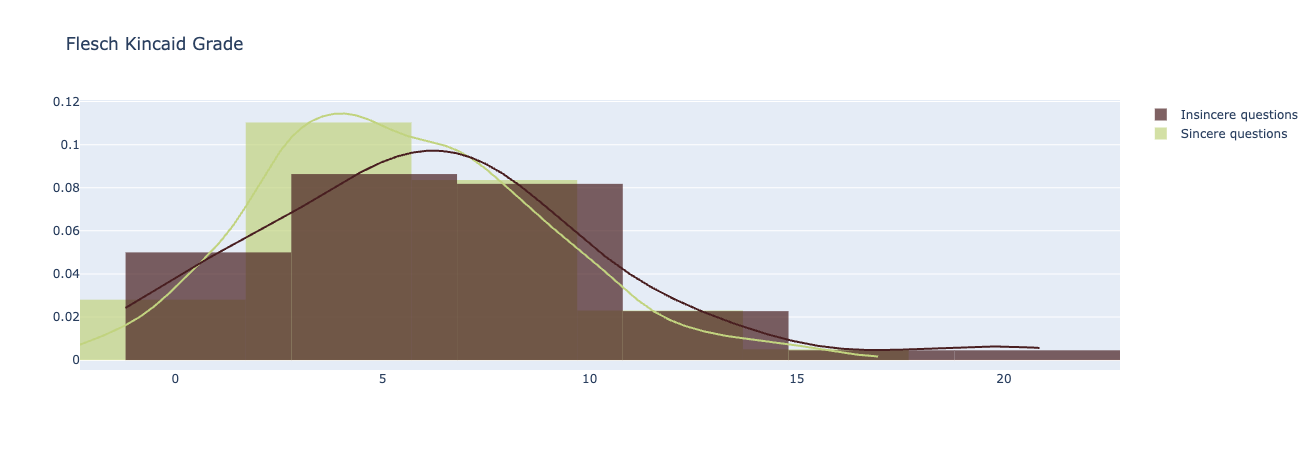

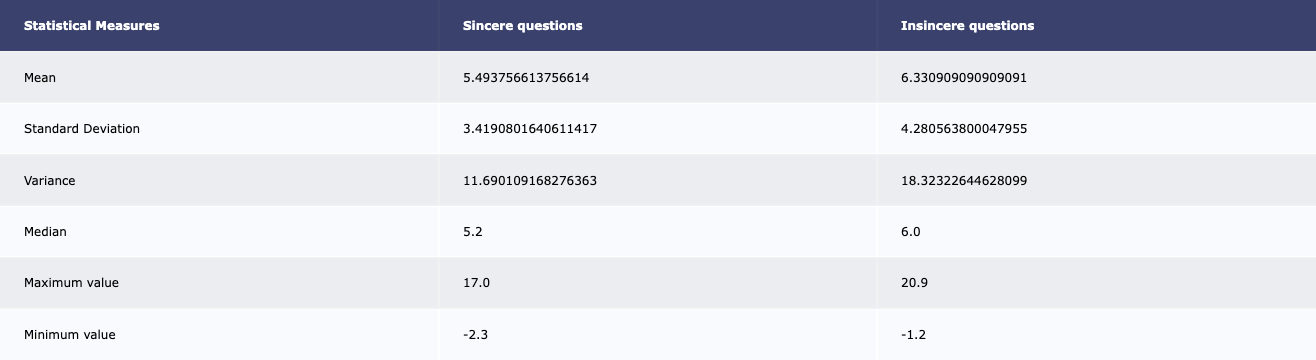

In [65]:
fkg_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.flesch_kincaid_grade))
fkg_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.flesch_kincaid_grade))
plot_readability(fkg_sincere,fkg_insincere,"Flesch Kincaid Grade",4,['#C1D37F','#491F21'])

100%|██████████| 55/55 [00:00<00:00, 19828.67it/s]


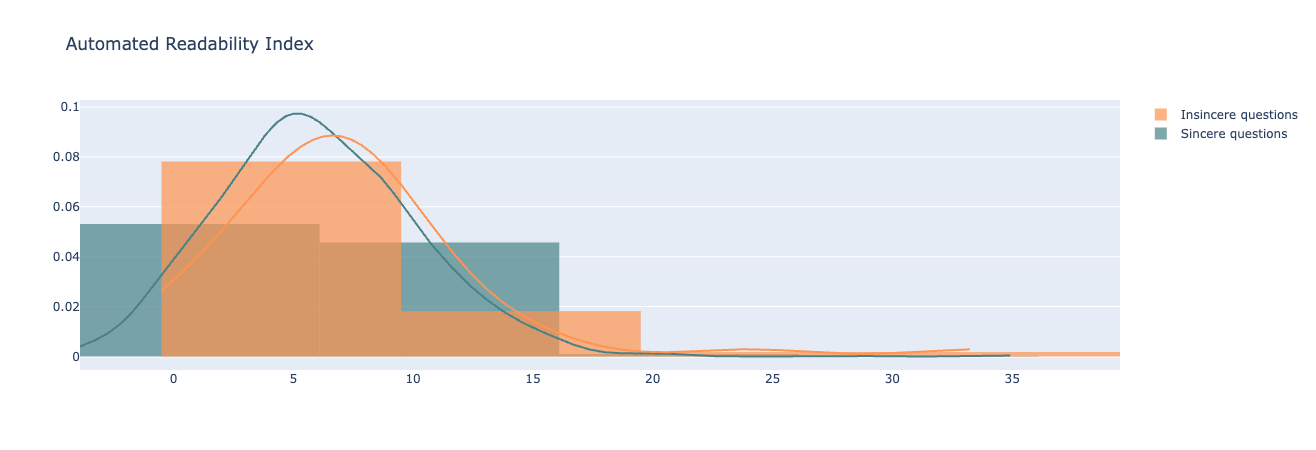

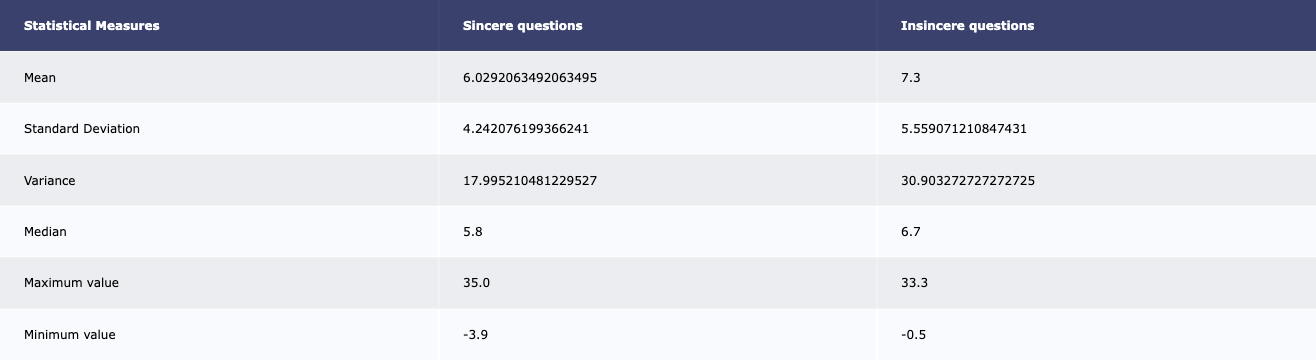

In [66]:
# Automated Readability Index
# Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text.For example if the ARI is 6.5, then the grade level to comprehend the text is 6th to 7th grade.

ari_sincere = np.array(quora_train["question_text"][quora_train["target"] == 0].progress_apply(textstat.automated_readability_index))
ari_insincere = np.array(quora_train["question_text"][quora_train["target"] == 1].progress_apply(textstat.automated_readability_index))
plot_readability(ari_sincere,ari_insincere,"Automated Readability Index",10,['#488286','#FF934F'])


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
from nltk.corpus import stopwords 
from nltk import word_tokenize, sent_tokenize, pos_tag, ne_chunk, FreqDist
from textblob import TextBlob
import collections
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from wordcloud import WordCloud
%matplotlib inline
py.init_notebook_mode(connected=True)

In [68]:
insicere_quiz=train_df[train_df['target']==1]
sincere_quiz=train_df[train_df['target']==0]

In [69]:
#most common words
tokens=[]
for i in train_df[0:10]['question_text']:
    for j in word_tokenize(i):
        tokens.append(j)


frequency_distribution=FreqDist(tokens).most_common()
print(frequency_distribution)

[('?', 10), ('What', 4), ('the', 4), ('in', 4), ('to', 3), ('and', 3), ('are', 2), ('not', 2), ('of', 2), ('school', 2), ('is', 2), (',', 2), ('high', 2), ('things', 1), ('do', 1), ('Kerela', 1), ('How', 1), ('internet', 1), ('causes', 1), ('lame', 1), ('generation', 1), ('gap', 1), ('Which', 1), ('company', 1), ('provides', 1), ('best', 1), ('quality', 1), ('corporate', 1), ('bus', 1), ('services', 1), ('Melbourne', 1), ('was', 1), ('your', 1), ('least', 1), ('favorite', 1), ('year', 1), ('grad', 1), ('Way', 1), ('Kingfisher', 1), ('beer', 1), ('available', 1), ('While', 1), ('en', 1), ('route', 1), ('Yavin', 1), ('IV', 1), ('first', 1), ('Death', 1), ('Star', 1), ('hits', 1), ('an', 1), ('anomaly', 1), ('ends', 1), ('up', 1), ('our', 1), ('universe', 1), ('oribit', 1), ('over', 1), ('modern-day', 1), ('2017', 1), ('Earth', 1), ('.', 1), ('happens', 1), ('Is', 1), ('it', 1), ('ok', 1), ('If', 1), ('my', 1), ('birth', 1), ('date', 1), ('wedding', 1), ('day', 1), ('same', 1), ('Does', 1

In [70]:
# Calculating Sentment Analysis with TextBlob
for i in train_df[0:5]['question_text']:
    print(i," => ",TextBlob(i).sentiment)

What are the things not to do in Kerela?  =>  Sentiment(polarity=0.0, subjectivity=0.0)
How internet causes lame generation gap?  =>  Sentiment(polarity=-0.5, subjectivity=0.75)
Which company provides the best quality corporate bus services in Melbourne?  =>  Sentiment(polarity=0.5, subjectivity=0.15)
What was your least favorite year of grad school?  =>  Sentiment(polarity=0.1, subjectivity=0.7)
Way Kingfisher beer is not available?  =>  Sentiment(polarity=-0.2, subjectivity=0.4)


In [71]:
# Extracting the sentiment polarity of a text
for i in train_df[0:5]['question_text']:
    print(TextBlob(i).sentiment.polarity)

0.0
-0.5
0.5
0.1
-0.2


In [72]:
# Extracting the sentiment subjectivity of a text
for i in train_df[0:5]['question_text']:
    print(TextBlob(i).sentiment.subjectivity)

0.0
0.75
0.15
0.7
0.4


In [73]:
for i in train_df[0:2]['question_text']:
    print(TextBlob(i).ngrams(n=3))

[WordList(['What', 'are', 'the']), WordList(['are', 'the', 'things']), WordList(['the', 'things', 'not']), WordList(['things', 'not', 'to']), WordList(['not', 'to', 'do']), WordList(['to', 'do', 'in']), WordList(['do', 'in', 'Kerela'])]
[WordList(['How', 'internet', 'causes']), WordList(['internet', 'causes', 'lame']), WordList(['causes', 'lame', 'generation']), WordList(['lame', 'generation', 'gap'])]


In [74]:
corpus=[]
for i in train_df[0:5]['question_text']:
    corpus.append(i)

cvect = CountVectorizer(ngram_range=(1,1))
counts = cvect.fit_transform(corpus)
normalized_counts = normalize(counts, norm='l1', axis=1)

tfidf = TfidfVectorizer(ngram_range=(1,1), smooth_idf=False)
tfs = tfidf.fit_transform(corpus)
new_tfs = normalized_counts.multiply(tfidf.idf_)

feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in corpus]
df = pd.DataFrame(new_tfs.T.todense(), index=feature_names, columns=corpus_index)

print(df)

            What are the things not to do in Kerela?  \
are                                         0.289938   
available                                   0.000000   
beer                                        0.000000   
best                                        0.000000   
bus                                         0.000000   
causes                                      0.000000   
company                                     0.000000   
corporate                                   0.000000   
do                                          0.289938   
favorite                                    0.000000   
gap                                         0.000000   
generation                                  0.000000   
grad                                        0.000000   
how                                         0.000000   
in                                          0.212921   
internet                                    0.000000   
is                                          0.00

In [75]:
#Bow with collection
token=[]
for i in train_df[0:5]['question_text']:
    token.append(i)

bow = [collections.Counter(words.split(" ")) for words in token]
total_bow=sum(bow,collections.Counter())
print(total_bow)

Counter({'What': 2, 'the': 2, 'not': 2, 'in': 2, 'are': 1, 'things': 1, 'to': 1, 'do': 1, 'Kerela?': 1, 'How': 1, 'internet': 1, 'causes': 1, 'lame': 1, 'generation': 1, 'gap?': 1, 'Which': 1, 'company': 1, 'provides': 1, 'best': 1, 'quality': 1, 'corporate': 1, 'bus': 1, 'services': 1, 'Melbourne?': 1, 'was': 1, 'your': 1, 'least': 1, 'favorite': 1, 'year': 1, 'of': 1, 'grad': 1, 'school?': 1, 'Way': 1, 'Kingfisher': 1, 'beer': 1, 'is': 1, 'available?': 1})


Models

In [76]:
train_df['target'].value_counts()

target
0    945
1     55
Name: count, dtype: int64

Model Training

In [2]:
import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch
from torchtext import data
#import spacy
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
tqdm.pandas(desc='Progress')
from collections import Counter
from textblob import TextBlob
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [3]:
import os 
import nltk
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# cross validation and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from unidecode import unidecode

from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
import lightgbm as lgb


In [16]:
import nltk
from nltk.corpus import stopwords

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
# Some preprocesssing that will be common to all the text classification methods you will see. 

# Remove punctuations:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]


def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, ' ')
    return x


# We won't clean numbers in conventional methods case since we might get extra info from bigrams like 5 mins or 30 mins
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x


# Remove Misspell:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)
def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]
    return mispellings_re.sub(replace, text)


# remove stopwords:
stopword_list = nltk.corpus.stopwords.words('english')
def remove_stopwords(text, is_lower_case=True):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


# remove contractions:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}


def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Using lemmatizer to keep dictionary form of words. Might be helpful if later we want to use word embeddings.
wordnet_lemmatizer = WordNetLemmatizer()
def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

def clean_sentence(x):
    x = x.lower()
    x = clean_text(x)
    x = replace_typical_misspell(x)
    x = remove_stopwords(x)
    x = replace_contractions(x)
    x = lemma_text(x)
    x = x.replace("'","")
    return x



In [5]:
train_df = pd.read_csv("../input/quora-insincere-questions-classification/train.csv")#[:400000]
test_df = pd.read_csv("../input/quora-insincere-questions-classification/test.csv")#[:20000]
print("Train shape : ",train_df.shape)
print("Test shape : ",test_df.shape)

Train shape :  (400000, 3)
Test shape :  (20000, 2)


In [8]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [9]:
# clean the sentences
train_df['cleaned_text'] = train_df['question_text'].apply(lambda x : clean_sentence(x))
test_df['cleaned_text'] = test_df['question_text'].apply(lambda x : clean_sentence(x))

In [13]:
train_text = train_df['question_text']
test_text = test_df['question_text']
train_target = train_df['target']
# all_text = pd.concat([train_text, test_text] axis=1)
all_text = train_text._append(test_text)

In [14]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(all_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)

train_text_features_cv = count_vectorizer.transform(train_text)
test_text_features_cv = count_vectorizer.transform(test_text)

train_text_features_tf = tfidf_vectorizer.transform(train_text)
test_text_features_tf = tfidf_vectorizer.transform(test_text)

In [20]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018)
test_preds = 0
oof_preds = np.zeros([train_df.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_df)):
    x_train, x_valid = train_text_features_tf[train_idx,:], train_text_features_tf[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression()
    print('fitting.......')
    classifier.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]
    test_preds += 0.2*classifier.predict_proba(test_text_features_tf)[:,1]

fitting.......


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predicting......


fitting.......


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predicting......


fitting.......


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predicting......


fitting.......


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predicting......


fitting.......
predicting......




/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
pred_train = (oof_preds > .25).astype(np.int_)
f1_score(train_target, pred_train)

0.5954026995100602

In [22]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 2018)
test_preds1 = 0
oof_preds1 = np.zeros([train_df.shape[0],])

test_preds2 = 0
oof_preds2 = np.zeros([train_df.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_df)):
    x_train, x_valid = train_text_features_cv[train_idx,:], train_text_features_cv[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier1 = MultinomialNB()
    classifier2 = BernoulliNB()
    print('fitting.......')
    classifier1.fit(x_train,y_train)
    classifier2.fit(x_train,y_train)
    print('predicting......')
    print('\n')
    oof_preds1[valid_idx] = classifier1.predict_proba(x_valid)[:,1]
    test_preds1 += 0.2*classifier1.predict_proba(test_text_features_cv)[:,1]
    oof_preds2[valid_idx] = classifier2.predict_proba(x_valid)[:,1]
    test_preds2 += 0.2*classifier2.predict_proba(test_text_features_cv)[:,1]

fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......


fitting.......
predicting......




In [24]:
pred_train = (oof_preds1 > .3).astype(np.int_)
f1_score(train_target, pred_train)

0.5233002170778469

In [25]:
pred_train = (oof_preds2 > .3).astype(np.int_)
f1_score(train_target, pred_train)

0.5043828565034131